
### TD3 : Analyse des Données Textuelles en Python pour le NLP


Objectifs du TD

— Explorer des méthodes d’analyse des données textuelles.

— Visualiser des informations clés (fréquences, nuages de mots).

— Utiliser des outils pour effectuer une analyse de sentiment.

### Prérequis

— Données textuelles nettoyées à partir du TD précédent.

— Python 3.7+

— Bibliothèques nécessaires : Pandas, Matplotlib, WordCloud, TextBlob.

Plan du TD

1. Exploration statistique

2. Visualisation

3. Analyse de sentiments

1 Exploration statistique

Dans cette section, nous allons explorer les données textuelles nettoyées pour en extraire des informations clés comme les fréquences de mots.

Étapes à suivre :

— Charger les données nettoyées depuis un fichier CSV.

In [ ]:
import pandas as pd

file_path = 'resultats_nettoyes_tokenises.csv'
df = pd.read_csv(file_path)

print("Aperçu des données :")
print(df.head())


Aperçu des données :
                             contenu_textuel_extrait  \
0  The Role of Telomerase in Breast Cancer's Resp...   
1  This site needs JavaScript to work properly. P...   
2  Clipboard, Search History, and several other a...   
3                          Skip to main page content   
4  An official website of the United States gover...   

                             contenu_textuel_nettoye  \
0  the role of telomerase in breast cancers respo...   
1  this site needs javascript to work properly pl...   
2  clipboard search history and several other adv...   
3                          skip to main page content   
4  an official website of the united states gover...   

                                              tokens  \
0  ['the', 'role', 'of', 'telomerase', 'in', 'bre...   
1  ['this', 'site', 'needs', 'javascript', 'to', ...   
2  ['clipboard', 'search', 'history', 'and', 'sev...   
3          ['skip', 'to', 'main', 'page', 'content']   
4  ['an', 'official', 'we

— Identifier les mots les plus fréquents en utilisant une bibliothèque d’analyse de texte.

In [6]:
from collections import Counter
all_tokens = [token for tokens_list in df['tokens'].apply(eval) for token in tokens_list]

word_freq = Counter(all_tokens)

print("Les 10 mots les plus fréquents :")
print(word_freq.most_common(10))


Les 10 mots les plus fréquents :
[('in', 54), ('search', 52), ('of', 48), ('to', 42), ('the', 39), ('and', 38), ('cancer', 31), ('pubmed', 27), ('add', 20), ('telomerase', 17)]


— Calculer les statistiques de base sur les fréquences des mots.

In [8]:
import numpy as np


frequencies = list(word_freq.values())

# Calcul des les statistiques
print("\nStatistiques de base sur les fréquences des mots :")
print(f"Nombre total de mots uniques : {len(word_freq)}")
print(f"Fréquence minimale : {min(frequencies)}")
print(f"Fréquence maximale : {max(frequencies)}")
print(f"Fréquence moyenne : {np.mean(frequencies):.2f}")



Statistiques de base sur les fréquences des mots :
Nombre total de mots uniques : 694
Fréquence minimale : 1
Fréquence maximale : 54
Fréquence moyenne : 2.60


### 2 - Visualisation




— Générer un nuage de mots pour visualiser les mots les plus fréquents.


— Utiliser une bibliothèque de visualisation comme Matplotlib pour afficher les résultats.

In [14]:
pip install wordcloud matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


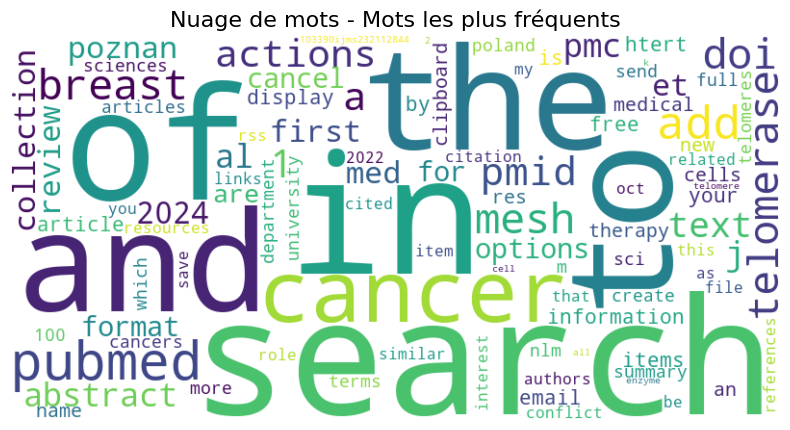

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_path = 'resultats_nettoyes_tokenises.csv'
df = pd.read_csv(file_path)


all_tokens = [token for tokens_list in df['tokens'].apply(eval) for token in tokens_list]


word_freq = Counter(all_tokens)


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,  # Limiter à 100 mots
    colormap='viridis'
).generate_from_frequencies(word_freq)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Nuage de mots - Mots les plus fréquents', fontsize=16)
plt.show()


## Analyse de sentiments


### Dans cette partie, nous utilisons un outil comme TextBlob pour effectuer une analyse de sentiments des textes nettoyés

Étapes à suivre :

— Appliquer une fonction d’analyse de sentiment sur les textes nettoyés pour obtenir un score de polarité.
 
— Visualiser la distribution des scores de sentiment à l’aide d’un histogramme.

— Comparer les résultats obtenus avec des exemples concrets pour valider les interprétations.

In [16]:

pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 626 kB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

file_path = 'resultats_nettoyes_tokenises.csv'
df = pd.read_csv(file_path)

df['contenu_textuel_nettoye'] = df['contenu_textuel_nettoye'].fillna('').astype(str)


df['polarite'] = df['contenu_textuel_nettoye'].apply(lambda x: TextBlob(x).sentiment.polarity)


print("Exemple de scores de polarité :")
print(df[['contenu_textuel_nettoye', 'polarite']].head())


Exemple de scores de polarité :
                             contenu_textuel_nettoye  polarite
0  the role of telomerase in breast cancers respo...  0.000000
1  this site needs javascript to work properly pl...  0.050000
2  clipboard search history and several other adv...  0.091667
3                          skip to main page content  0.166667
4  an official website of the united states gover...  0.000000


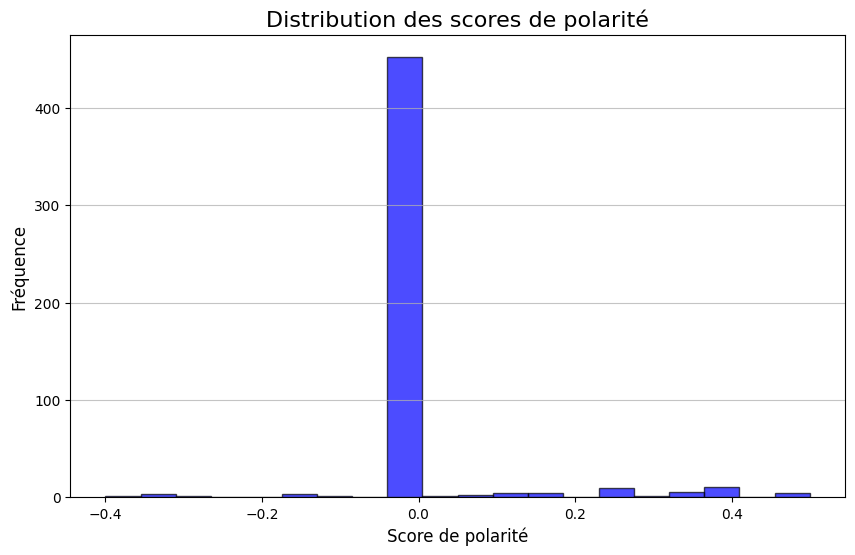

In [20]:

plt.figure(figsize=(10, 6))
plt.hist(df['polarite'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution des scores de polarité', fontsize=16)
plt.xlabel('Score de polarité', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:

textes_negatifs = df[df['polarite'] < 0].sort_values(by='polarite').head(5)
textes_positifs = df[df['polarite'] > 0].sort_values(by='polarite', ascending=False).head(5)

print("\nExemples de textes négatifs :")
print(textes_negatifs[['contenu_textuel_nettoye', 'polarite']])

print("\nExemples de textes positifs :")
print(textes_positifs[['contenu_textuel_nettoye', 'polarite']])



Exemples de textes négatifs :
                               contenu_textuel_nettoye  polarite
331  obesitysenescencebreast cancer clinical presen...   -0.4000
73      unable to load your collection due to an error   -0.3125
79       unable to load your delegates due to an error   -0.3125
157  unable to load your collection due to an error...   -0.3125
286  complex roles for telomeres and telomerase in ...   -0.3000

Exemples de textes positifs :
    contenu_textuel_nettoye  polarite
121            send at most       0.5
445  linkout more resources       0.5
193  linkout more resources       0.5
180  linkout more resources       0.5
151        free pmc article       0.4
